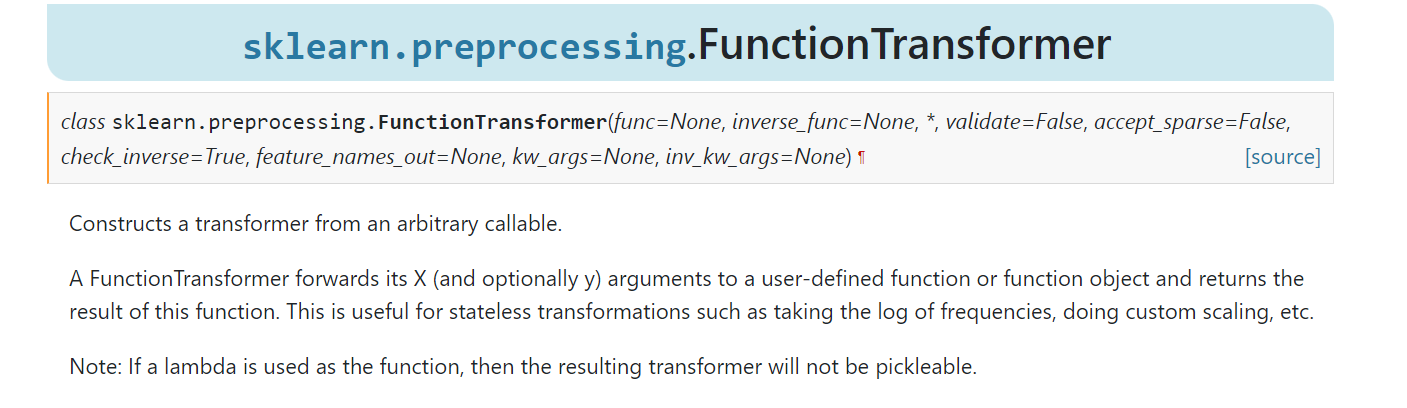

In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.iloc[:,1:3]

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [12]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

### Splitting the data into train and test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Lets see how our features are distributed

#### Plotting before any transformation

In [17]:
import warnings
warnings.filterwarnings("ignore")

#### Age:

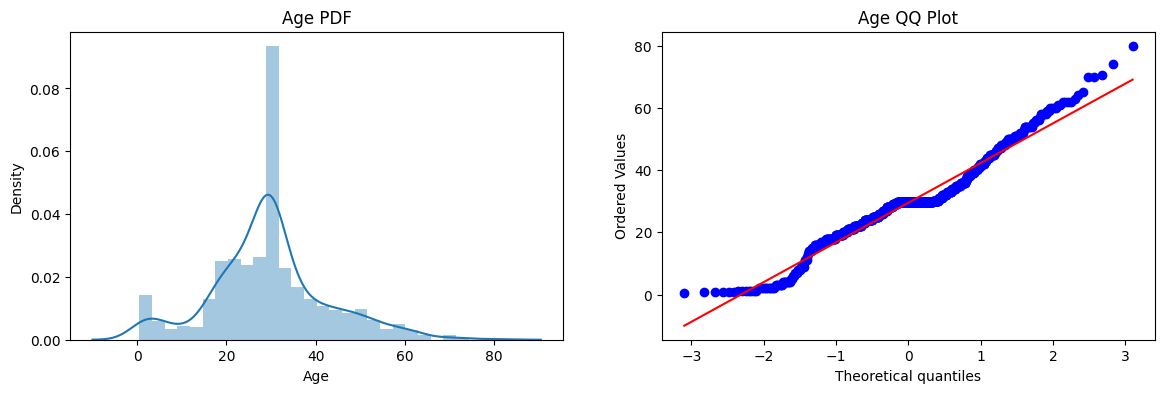

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

- Age feature is very close to normal distribution.

#### Fare:

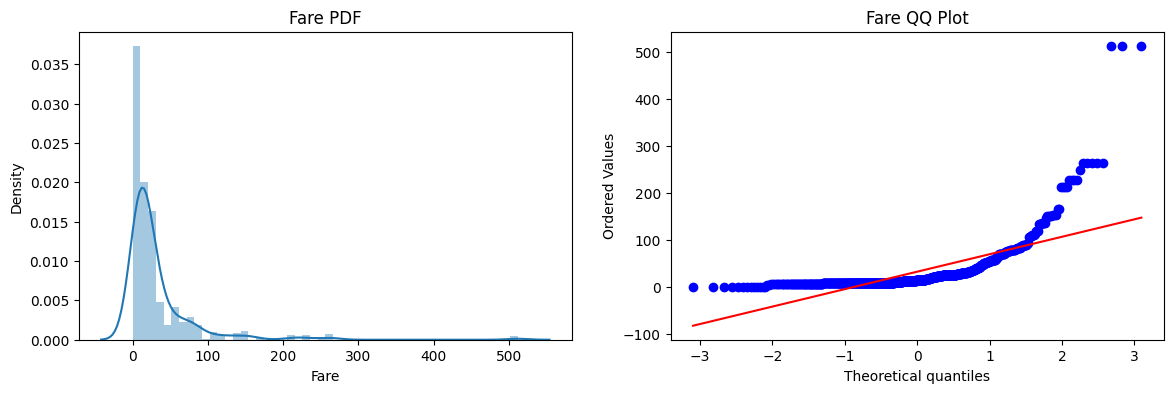

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

- Fare feature is showing right skewed distribution
- For right skewed data, log transformation is better.

### Let's train some model and try to find difference before and after transformation

#### Before Transformation:

In [20]:
LogReg = LogisticRegression()
DecTree = DecisionTreeClassifier()

In [21]:
LogReg.fit(X_train,y_train)
DecTree.fit(X_train,y_train)
    
y_pred = LogReg.predict(X_test)
y_pred1 = DecTree.predict(X_test)
    
print("Accuracy Logistic Regression",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree",accuracy_score(y_test,y_pred1))

Accuracy Logistic Regression 0.6480446927374302
Accuracy Decision Tree 0.6536312849162011


### Now let's apply transformation

#### After Transformation:

In [22]:
transformer = FunctionTransformer(func=np.log1p)

In [23]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [25]:
LogReg = LogisticRegression()
DecTree = DecisionTreeClassifier()

LogReg.fit(X_train_transformed,y_train)
DecTree.fit(X_train_transformed,y_train)
    
y_pred = LogReg.predict(X_test_transformed)
y_pred1 = DecTree.predict(X_test_transformed)
    
print("Accuracy Logistic Regression",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree",accuracy_score(y_test,y_pred1))

Accuracy Logistic Regression 0.6815642458100558
Accuracy Decision Tree 0.6759776536312849


- We get better accuracy in logistic regression after log transformation.
- Decision tree does not care about transformation of features.

#### Now let's use Cross Validation and see whether this little push in logistics regression accuracy is obvious or not.

In [27]:
X_transformed = transformer.fit_transform(X)

LogReg = LogisticRegression()
DecTree = DecisionTreeClassifier()

print("Logistic Regression",np.mean(cross_val_score(LogReg,X_transformed,y,scoring='accuracy',cv=10)))
print("Decision Tree",np.mean(cross_val_score(DecTree,X_transformed,y,scoring='accuracy',cv=10)))

Logistic Regression 0.678027465667915
Decision Tree 0.658876404494382


- Yes, after log transformation logistic regression is giving improvement in accuracy.

##### Let's see distribution of features after log transformation:

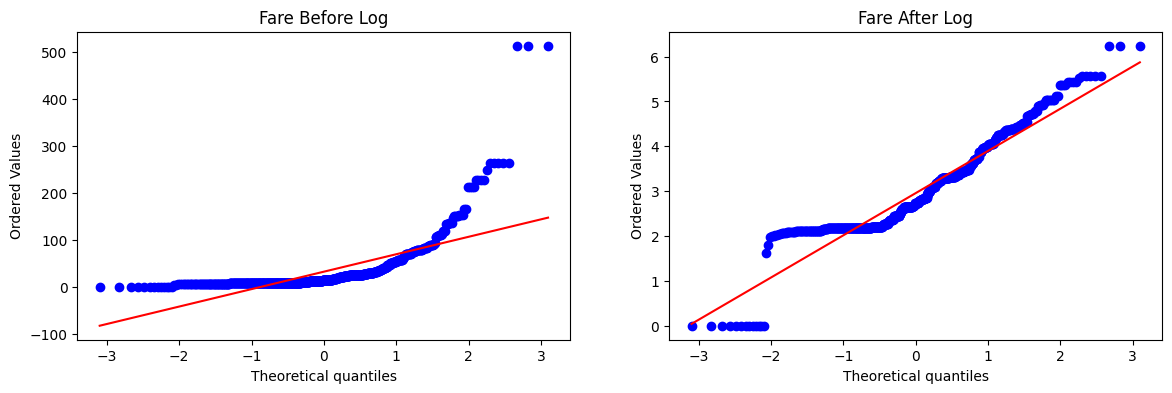

In [28]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

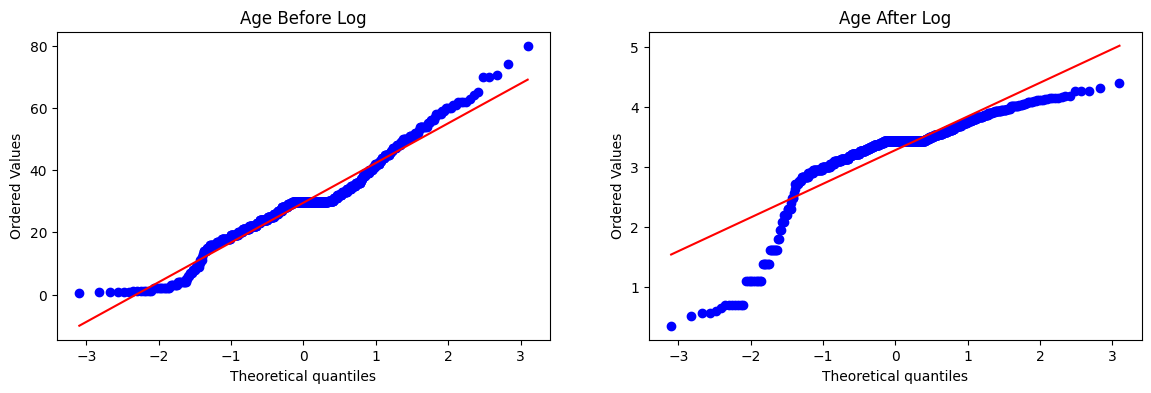

In [29]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

- Here we can observe that Age column after log transformation get disturbed from normal distribution.
- Means it was better without log transformation.
- Because we saw above that Age distribution was close to normal distribution without any transformation.

#### Now let's only tranform fare column:

In [35]:
transformer2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = transformer2.fit_transform(X_train)
X_test_transformed2 = transformer2.transform(X_test)

In [36]:
LogReg = LogisticRegression()
DecTree = DecisionTreeClassifier()

LogReg.fit(X_train_transformed2,y_train)
DecTree.fit(X_train_transformed2,y_train)
    
y_pred = LogReg.predict(X_test_transformed2)
y_pred2 = DecTree.predict(X_test_transformed2)
    
print("Accuracy Logistic Regression",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree",accuracy_score(y_test,y_pred2))

Accuracy Logistic Regression 0.6703910614525139
Accuracy Decision Tree 0.664804469273743


- We can see that result is same as before.

- Let's use cross validation and check the result with transformer2

In [37]:
X_transformed2 = transformer2.fit_transform(X)

LogReg = LogisticRegression()
DecTree = DecisionTreeClassifier()

print("Logistic Regression",np.mean(cross_val_score(LogReg,X_transformed2,y,scoring='accuracy',cv=10)))
print("Decision Tree",np.mean(cross_val_score(DecTree,X_transformed2,y,scoring='accuracy',cv=10)))

Logistic Regression 0.6712609238451936
Decision Tree 0.6599500624219725


- Same result: Before and after removing Age column from transformation.

#### Now, Let's check other transformation also such as:
- Reciprocal Transformation
- Square Transformation
- Square Root Transformation
- Any custom Transformation

In [38]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    transformer = ColumnTransformer([('transformer',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_tran = transformer.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_tran,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_tran[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

#### Square Transformation:

Accuracy 0.6442446941323345


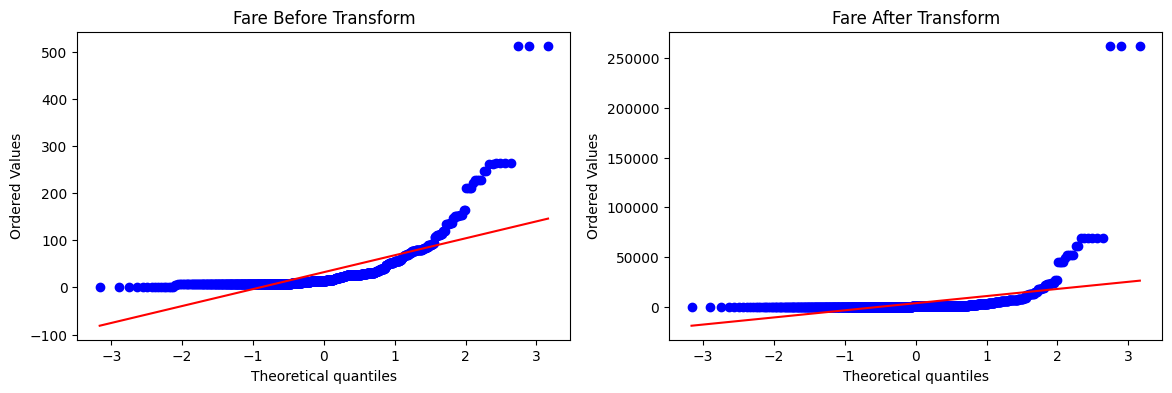

In [39]:
apply_transform(lambda x: x**2)

#### Reciprocal Transformation:

Accuracy 0.61729088639201


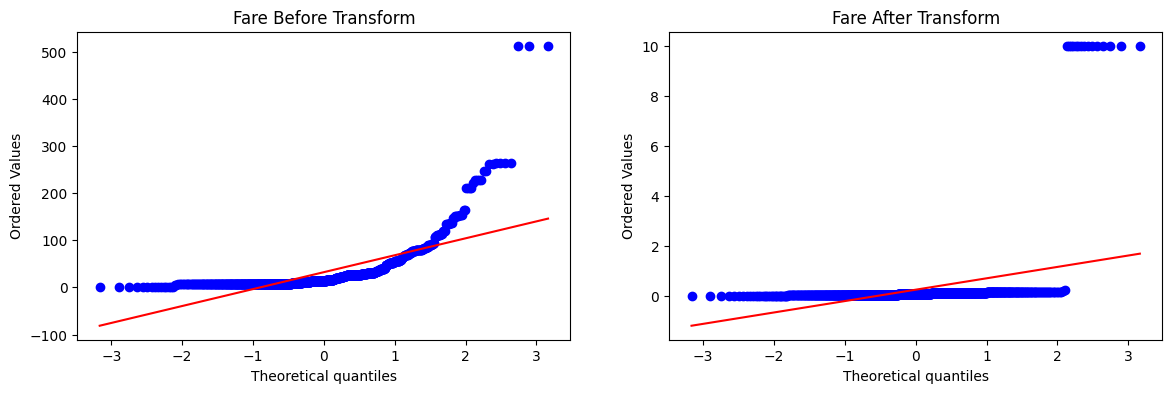

In [43]:
apply_transform(lambda x: 1/(x+0.1))

#### Square Root Transformation:

Accuracy 0.6589013732833957


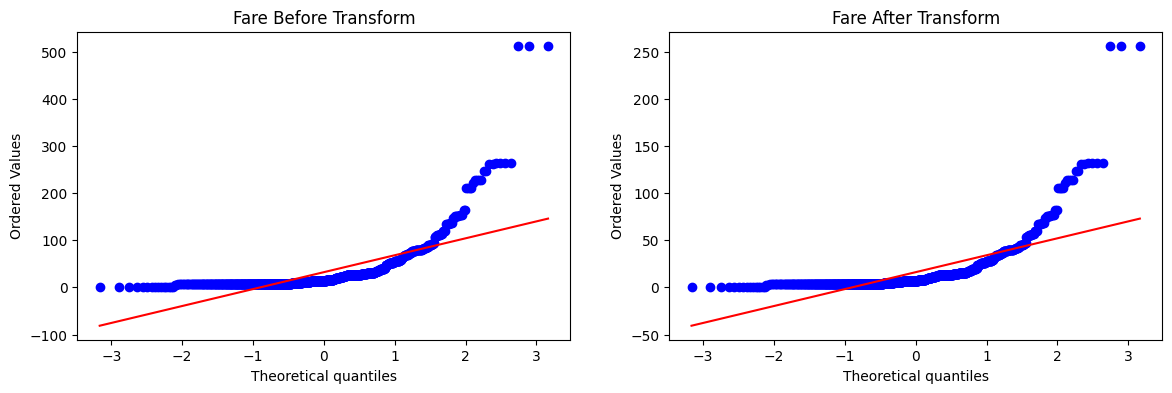

In [44]:
apply_transform(lambda x: x*1/2)

#### Custom Transformation:

Accuracy 0.616167290886392


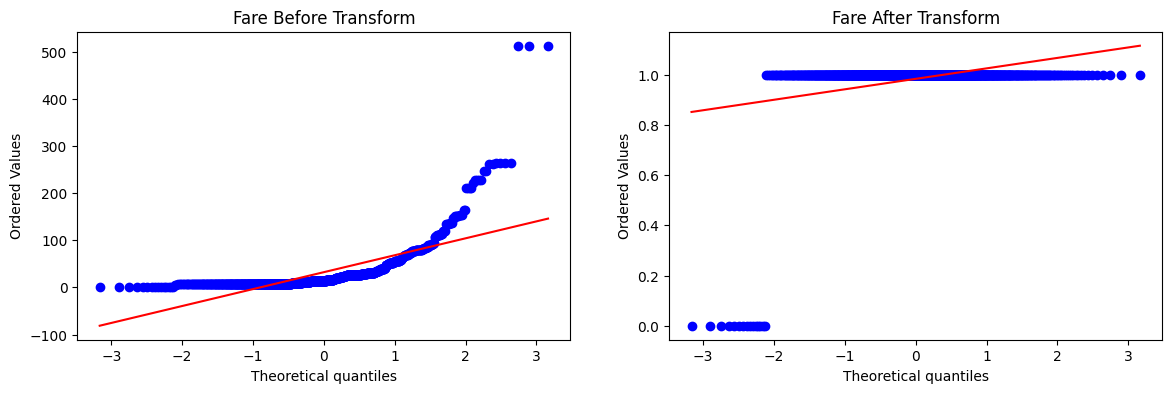

In [45]:
apply_transform(np.sign)

- By looking every accuracy, we can see which transformation is working better.
- These things are hit and trial method, we never know which transformation will give good result in which case.
- so it is better to try number of transformation and then decide accordingly.

*****************************************************************************************************